## PART 1: Introduction to Dataset and bakground
The data set chosen is from a survey of technology professionials based on Europe containing detailed information on the salary patterns of such people particularly those based in Gemrany. Ksenia Legostay was responsible for curating the data and the data was obtained from Kaggle.com. The file contains 3 CSV files with salary information for years 2018, 2019 and 2020. 

In [4]:
#Load in Python packages with relevant packages for data manipulation 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import opendatasets as od

od.download(
	"https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region")



#Load Each of the datasets in a separate data frame from now from the directory using pandas
salary2019 = pd.read_csv('2020-it-salary-survey-for-eu-region/T Salary Survey EU 2019.csv')
salary2020 = pd.read_csv('2020-it-salary-survey-for-eu-region/IT Salary Survey EU  2020.csv')

#Get a preview of shape of data frames and feature types
salary2019.info()
#salary2020.info()


Skipping, found downloaded files in "./2020-it-salary-survey-for-eu-region" (use force=True to force download)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 23 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Zeitstempel                                                                                           991 non-null    object 
 1   Age                                                                                                   882 non-null    float64
 2   Gender                                                                                                991 non-null    object 
 3   City                                                                                                  991 non-null    object

 I have loaded the datasets of interest and reviewed some intersting things about them, however my goal is to combine these two data frames into one as entire merger of the individual data sets keeping each observation of the data frame in mind. 

In [5]:
#Show first 5 rows of data frame to visually inspect
salary2019.head()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN


In [72]:
#Show first 5 rows of data frame to visually inspect
salary2020.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [73]:
#Show last 5 rows of data frame to visually inspect
salary2019.tail()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
572,05.12.2019 14:23:38,27.0,Male,Munich,Senior,Data Scientist,7.0,Python,90000.0,NaN,...,NaN,28.0,NaN,English,NaN,100-1000,Product,unlimited,Сommerce,NaN
573,05.12.2019 14:29:09,30.0,Male,Munich,Senior,Backend Developer,10.0,PHP,80000.0,NaN,...,NaN,31.0,NaN,English,NaN,1000+,Product,unlimited,Transport,NaN
574,05.12.2019 14:51:46,32.0,Female,Munich,Middle,Fullstack Developer,5.0,Python,70000.0,0.0,...,NaN,25.0,4.0,English,Fineway,50-100,Startup,unlimited,Tourism,NaN
575,05.12.2019 14:59:20,35.0,Male,Berlin,Senior,Mobile Developer,8.0,Kotlin,65000.0,5000.0,...,NaN,24.0,1.0,Deutsch,NaN,50-100,Product,unlimited,IT,NaN
576,05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
#Show last 5 rows of data frame to visually inspect
salary2020.tail()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0
1252,19/01/2021 12:01:11,26.0,Male,Berlin,DevOps,2,2,Middle,yaml,"Python, AWS, Kubernetes, Docker, terraform, an...",...,0,30,Full-time employee,Unlimited contract,English,51-100,Startup,No,30.0,600


Now it is important to have an order and homogenity in our new dataset, so extensive data cleaning must be applied to these data sets. I wish to rename the columns to make more sense and remove all columns that are irrelevant or provide little value to an analysis

In [75]:
#Obtain information on columns to get which has plenty missing values that may prove detrimental to analysis if not dealt with
salary2019.isnull().sum()

Zeitstempel                                                                                               0
Age                                                                                                      76
Gender                                                                                                    1
City                                                                                                      1
Seniority level                                                                                          10
Position (without seniority)                                                                              2
Years of experience                                                                                       1
Your main technology / programming language                                                              11
Yearly brutto salary (without bonus and stocks)                                                           2
Yearly bonus                

In [76]:
#Obtain information on columns to get which has plenty missing values that may prove detrimental to analysis if not dealt with
salary2020.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [77]:
#From the output of the cell above we can  drop Columns from the 2020 Salary Data set that have quite some missing data
salary2019 = salary2019.drop(columns = ['Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
                                         'Number of home office days per month', 
                                         'Yearly stocks', 
                                         
                                         'Yearly bonus',
                                         'Yearly stocks one year ago. Only answer if staying in same country',
                                         'Yearly bonus one year ago. Only answer if staying in same country',
                                         'Company business sector',
                                         '0'])
salary2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Zeitstempel                                      577 non-null    object 
 1   Age                                              501 non-null    float64
 2   Gender                                           576 non-null    object 
 3   City                                             576 non-null    object 
 4   Seniority level                                  567 non-null    object 
 5   Position (without seniority)                     575 non-null    object 
 6   Years of experience                              576 non-null    float64
 7   Your main technology / programming language      566 non-null    object 
 8   Yearly brutto salary (without bonus and stocks)  575 non-null    float64
 9   Number of vacation days         

In [78]:
#From the output of the cell above we can  drop Columns from the 2020 Salary Data set that have quite some missing data
salary2020 = salary2020.drop(columns = ['Annual bonus+stocks one year ago. Only answer if staying in same country',
                        'Have you lost your job due to the coronavirus outbreak?', 
                        'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
                        'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                        'Years of experience in Germany',
                        'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                        'Annual bonus+stocks one year ago. Only answer if staying in same country','Yearly bonus + stocks in EUR'])
salary2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Timestamp                                               1253 non-null   object 
 1   Age                                                     1226 non-null   float64
 2   Gender                                                  1243 non-null   object 
 3   City                                                    1253 non-null   object 
 4   Position                                                1247 non-null   object 
 5   Total years of experience                               1237 non-null   object 
 6   Seniority level                                         1241 non-null   object 
 7   Your main technology / programming language             1126 non-null   object 
 8   Other technologies/programming languag

In [79]:
#Rename Columns to simpler names and for homegenity between data frames. Zeitstempel is called Timestap in 2020 data set so I change the name here 
## to match that. 
salary2019.rename(columns = {'Your main technology / programming language': 'Main language', 'Position ': 'Position',
                     'Other technologies/programming languages you use often': 'Other technologies', 
                     'Yearly brutto salary (without bonus and stocks)': 'Yearly salary', 'Number of vacation days': 'Vacation days', 
                     'Main language at work': 'Language at work', 'Zeitstempel': 'Timestamp', 'Position (without seniority)': 'Position'
                      }, inplace = True)
salary2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            577 non-null    object 
 1   Age                  501 non-null    float64
 2   Gender               576 non-null    object 
 3   City                 576 non-null    object 
 4   Seniority level      567 non-null    object 
 5   Position             575 non-null    object 
 6   Years of experience  576 non-null    float64
 7   Main language        566 non-null    object 
 8   Yearly salary        575 non-null    float64
 9   Vacation days        541 non-null    float64
 10  Language at work     571 non-null    object 
 11  Company name         131 non-null    object 
 12  Company size         565 non-null    object 
 13  Company type         558 non-null    object 
 14  Сontract duration    562 non-null    object 
dtypes: float64(4), object(11)
memory usage: 

In [80]:
#Rename Columns to simpler names and for homegenity between data frames
salary2020.rename(columns = {'Your main technology / programming language': 'Main language', 'Position ': 'Position',
                     'Other technologies/programming languages you use often': 'Other technologies', 
                     'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly salary', 'Number of vacation days': 'Vacation days', 
                     'Main language at work': 'Language at work','Yearly bonus + stocks in EUR':'Yearly bonus',
                     'Total years of experience': 'Years of experience' }, inplace = True)

Now I have tried to make the dataframes as similar as possible by removing columns from each that were irrelevant. Next I will try to join the dataframes and check how well they merge. I will analyse any columns that are irrelevant in the new large dataframe and drop any from there and also check the feature types 

In [81]:
#Merge the two data frames by putting them in an array first
dataframes = [salary2019, salary2020]

#Concatenate/merge the two data frames using the concat from panadas library and save into new df
result_df = pd.concat(dataframes)
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 0 to 1252
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            1830 non-null   object 
 1   Age                  1727 non-null   float64
 2   Gender               1819 non-null   object 
 3   City                 1829 non-null   object 
 4   Seniority level      1808 non-null   object 
 5   Position             1822 non-null   object 
 6   Years of experience  1813 non-null   object 
 7   Main language        1692 non-null   object 
 8   Yearly salary        1828 non-null   float64
 9   Vacation days        1726 non-null   object 
 10  Language at work     1808 non-null   object 
 11  Company name         131 non-null    object 
 12  Company size         1800 non-null   object 
 13  Company type         1786 non-null   object 
 14  Сontract duration    1786 non-null   object 
 15  Other technologies   1096 non-null   o

The merger of the two data frames is decent enough, I will still have to deal with feature types and missing data in this new data frame. However I see that the feature 'EmployeeStatus' is only relevant in the 2020 Salary observation so I will drop them before I continue the analysis

In [82]:
result_df = result_df.drop (columns = ['Employment status'])

In [83]:
result_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 0 to 1252
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            1830 non-null   object 
 1   Age                  1727 non-null   float64
 2   Gender               1819 non-null   object 
 3   City                 1829 non-null   object 
 4   Seniority level      1808 non-null   object 
 5   Position             1822 non-null   object 
 6   Years of experience  1813 non-null   object 
 7   Main language        1692 non-null   object 
 8   Yearly salary        1828 non-null   float64
 9   Vacation days        1726 non-null   object 
 10  Language at work     1808 non-null   object 
 11  Company name         131 non-null    object 
 12  Company size         1800 non-null   object 
 13  Company type         1786 non-null   object 
 14  Сontract duration    1786 non-null   object 
 15  Other technologies   1096 non-null   o

## Part II: Understanding the Data 
Now it is time to work on column data types and convert them to the right types, the timestamp column is too verbose and I would like to extract only the data from the timestamp and remove the nanoseconds. I would convert it to a date format.

In [84]:
#Convert Timestamp to datetime format then create a new column with the Dates and remove the old timestamp column
result_df['Timestamp'] = pd.to_datetime(result_df['Timestamp'], errors = 'coerce')
result_df['Date'] = result_df['Timestamp'].dt.date
result_df = result_df.drop('Timestamp', axis = 1)


Now I will change the other column types to the appropriate categories

In [85]:
#Change Age, Vacation Days, Years of Experience Columns to Integer types and replace any Nan values in hese columns
result_df['Age'] = result_df['Age'].fillna(0).astype(int)
result_df['Vacation days'] = pd.to_numeric(result_df['Vacation days'], errors = 'coerce').fillna(0).astype(int)
result_df['Years of experience'] = pd.to_numeric(result_df['Years of experience'], errors = 'coerce').fillna(0).astype(int)


In [86]:
#Convert Language at work, company size, Company type, contact duration, position, seniority, gender and main language to categorical data
result_df['Language at work'] = result_df['Language at work'].astype('category')
result_df['Company size'] = result_df['Company size'].astype('category')
result_df['Company type'] = result_df['Company type'].astype('category')
result_df['Company size'] = result_df['Company size'].astype('category')
result_df['Сontract duration'] = result_df['Сontract duration'].astype('category')
result_df['Position'] = result_df['Position'].astype('category')
result_df['Gender'] = result_df['Gender'].astype('category')
result_df['Seniority level'] = result_df['Seniority level'].astype('category')
result_df['Main language'] = result_df['Main language'].astype('category')





In [87]:
#Change City and Other technologies column to strings
result_df['City'] = result_df['City'].astype('str')
result_df['Other technologies'] = result_df['Other technologies'].astype('str').fillna(0)

The Date column has dates going into 2021, I wish to remove these so I will filter dates from 2019 and 2020 only

In [88]:
#Convert Date column to date type adn filter Date Values from the column from 2019 and 2020 only
result_df['Date'] = pd.to_datetime(result_df['Date'], errors = 'coerce')
result_df = result_df[(result_df['Date'] > "2019-01-01") & (result_df['Date'] < "2020-12-31")]
result_df.tail()

,Age,Gender,City,Seniority level,Position,Years of experience,Main language,Yearly salary,Vacation days,Language at work,Company name,Company size,Company type,Сontract duration,Other technologies,Date
1210,36,Male,Berlin,Middle,Mobile Developer,10,Android,68000.0,30,English,NaN,1000+,Product,Unlimited contract,Kotlin,2020-12-29
1211,29,Male,Munich,Middle,Data Scientist,6,SQL,70000.0,28,English,NaN,1000+,Product,Unlimited contract,Python,2020-12-29
1212,30,Female,Berlin,Lead,Frontend Developer,3,JavaScript,57600.0,30,English,NaN,101-1000,Product,Unlimited contract,"AWS, Docker",2020-12-30
1213,30,Male,Munich,Senior,Software Engineer,8,PHP,68000.0,26,English,NaN,51-100,Product,Unlimited contract,"Javascript / Typescript, SQL, Docker",2020-12-30
1214,29,Male,Berlin,Senior,Backend Developer,5,Go,75000.0,25,English,NaN,101-1000,Product,Unlimited contract,"Go, Google Cloud, Kubernetes, Docker",2020-12-30


Now I inspect other column more thoroughly to establish all data in them make sense and are homogenous

In [89]:
# Inspecting the Gender column
print(f'Number of missing values: {result_df.Gender.isna().sum()}')
print(result_df.Gender.value_counts())

Number of missing values: 9
Male       1501
Female      279
Diverse       2
Name: Gender, dtype: int64


From inspection I see there are 9 missing gender values and a type known as 'Diverse' which I would like to remove and keep only Male and Female in my data

In [90]:
# Drop the missing values and Diverse group in the Gender Columnn
result_df = result_df[~(result_df.Gender == 'Diverse') & ~(result_df.Gender.isna())]

Inspect Numerical columns now to check if there are Outliers and possibly trim out the outliers in the data set to give greater analytical accuracy

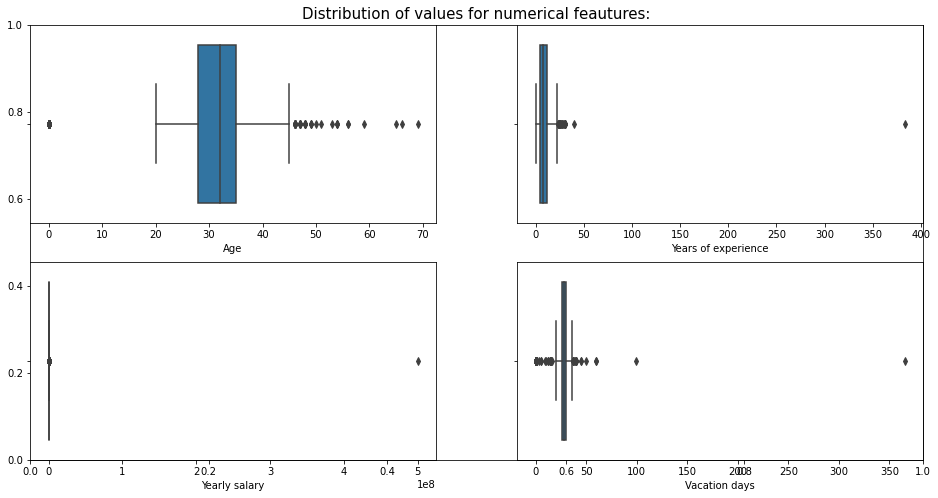

In [91]:
#I will plot a Box Plot for each of the numerical attributes using matplotlib to show any extreme outliers in the data set and trim them accordingly

boxplots = plt.figure(figsize= (16, 8))
plt.title('Distribution of values for numerical feautures:', fontsize= 15)
axs = boxplots.subplots(nrows=2, ncols= 2)
sns.boxplot(data = result_df, x= 'Age', ax = axs[0,0])
sns.boxplot(data = result_df, x= 'Years of experience',ax = axs[0,1])
sns.boxplot(data = result_df, x= 'Yearly salary',ax = axs[1,0])
sns.boxplot(data = result_df, x= 'Vacation days', ax= axs[1,1])
plt.show()

A quick visual inspection of the plots show many outliers exist in the data set for the numerical attributes. I will plot histograms for these values again to get another view of the outliers in tha data set


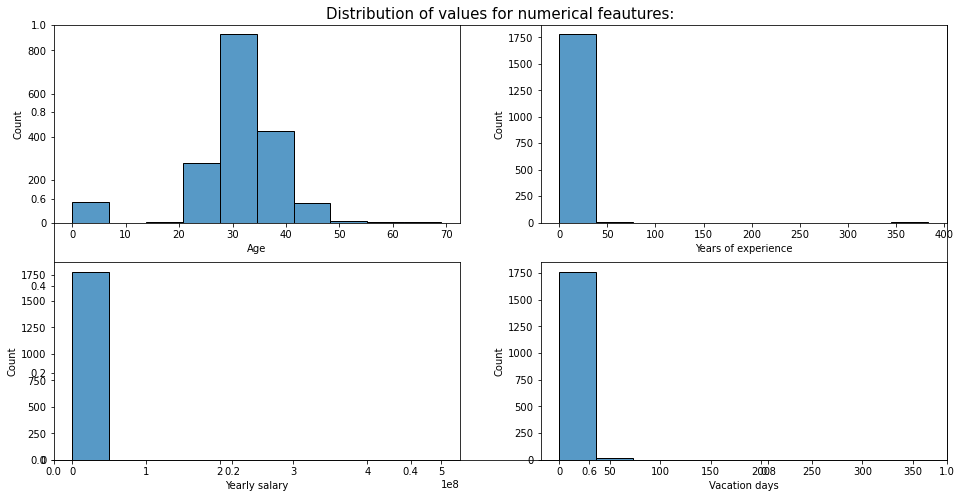

In [92]:
histograms = plt.figure(figsize= (16, 8))
plt.title('Distribution of values for numerical feautures:', fontsize= 15)
axs = histograms.subplots(nrows=2, ncols= 2)
sns.histplot(data = result_df, x= 'Age', ax = axs[0,0], bins = 10)
sns.histplot(data = result_df, x= 'Years of experience',ax = axs[0,1], bins= 10)
sns.histplot(data = result_df, x= 'Yearly salary',ax = axs[1,0], bins = 10)
sns.histplot(data = result_df, x= 'Vacation days', ax= axs[1,1], bins = 10)
plt.show()

With the plots I have above, I can get to work on analysing the individual feautures and editing values

In [93]:
#The Boxplot shows that the Yearly Salary has some extreme outliers, I wish to find out what these are
result_df['Yearly salary'].sort_values()

982         10001.0
883         10001.0
366         10164.0
770         11000.0
1135        11500.0
           ...     
630        250000.0
576        300000.0
778        850000.0
853     500000000.0
475             NaN
Name: Yearly salary, Length: 1780, dtype: float64

In [94]:
#The code above returned some of the outlier values for the Yearly Salary column, I will drop these from my data set with their returned indexes
result_df = result_df.drop(index = [475, 778, 853])


I believe it is best to write a python function for the other three attributes to remove outlier values. This function will use principles of creating a box plot and remove intances from the data set where the observed value is higher or lower than 1.5 * The computed IQR of the variable highlighting it an outlier. I will then apply this function to the other numerical variables and check the impact of the change on the data set

In [95]:
#Python function to remove outliers
def outlier_removal (dataSet, column):
    #25th percentile
    Q1 = dataSet[column].quantile(0.25)
    #75th percentile
    Q3 = dataSet[column].quantile(0.75)
    #Inter Quartile Range
    IQR = Q3 - Q1
    top_boundary = Q3 + 1.5 * IQR
    bottom_boundary = Q1 - 1.5 * IQR
    #New Dataset based on upper and lower boundaries 
    result_df = dataSet.loc[(dataSet[column] >= bottom_boundary) & (dataSet[column] <= top_boundary)]
    return result_df
    

Now apply this function to the other numerical variables....

In [96]:
Age = outlier_removal(result_df, 'Age')
Experience = outlier_removal(result_df, 'Years of experience')
Salary = outlier_removal(result_df, 'Yearly salary')
Vacation = outlier_removal(result_df, 'Vacation days')

Plot the new distrubutions with the outliers removed and they should be more accurate boxplots and histograms of the data with improved distrubutions

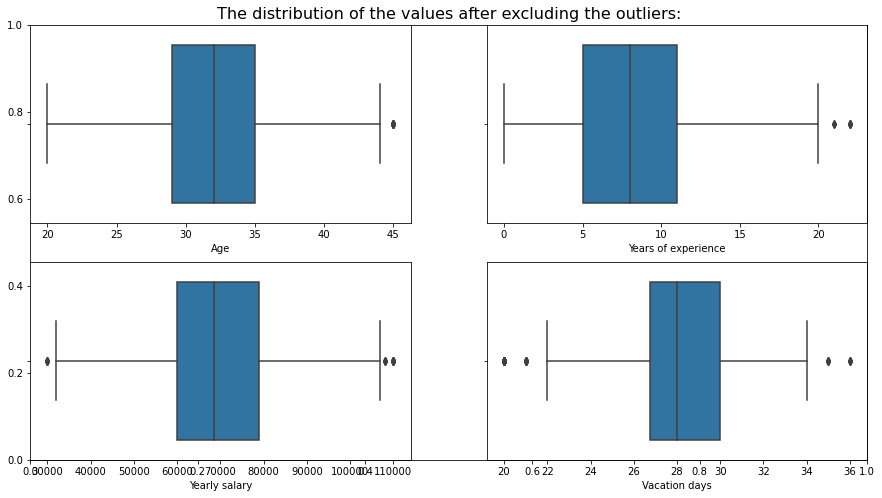

In [97]:
fig = plt.figure(figsize= (15, 8))
plt.title('The distribution of the values after excluding the outliers:', fontsize= 16)
axs = fig.subplots(nrows=2, ncols= 2)
sns.boxplot(data = Age, x= 'Age', ax = axs[0,0])
sns.boxplot(data = Experience, x= 'Years of experience',ax = axs[0,1])
sns.boxplot(data = Salary, x= 'Yearly salary',ax = axs[1,0])
sns.boxplot(data = Vacation, x= 'Vacation days', ax= axs[1,1])
plt.show()

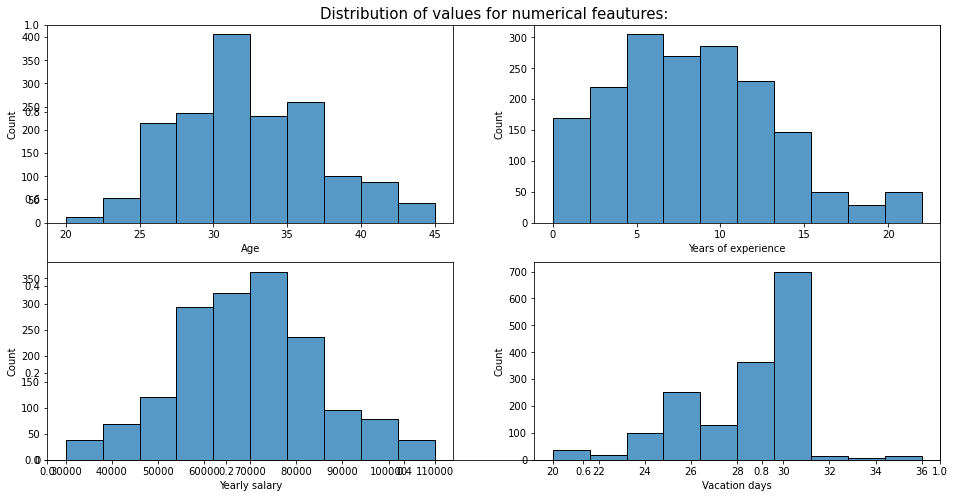

In [98]:
histograms = plt.figure(figsize= (16, 8))
plt.title('Distribution of values for numerical feautures:', fontsize= 15)
axs = histograms.subplots(nrows=2, ncols= 2)
sns.histplot(data = Age, x= 'Age', ax = axs[0,0], bins = 10)
sns.histplot(data = Experience, x= 'Years of experience',ax = axs[0,1], bins= 10)
sns.histplot(data = Salary, x= 'Yearly salary',ax = axs[1,0], bins = 10)
sns.histplot(data = Vacation, x= 'Vacation days', ax= axs[1,1], bins = 10)
plt.show()

Now the distributions for the numerical varibales look good, I will check the other columns to see what is happening

In [99]:
# Isnpect Contract Duration colum
print(result_df['Сontract duration'].value_counts())
print('Missing values:',result_df['Сontract duration'].isna().sum())

Unlimited contract    1115
unlimited              511
Temporary contract      63
more than 1 year        30
1 year                  12
6 months                 5
3 months                 2
0                        1
less than 3 months       1
Name: Сontract duration, dtype: int64
Missing values: 36


Since I merged two data frames, the categories of Conract duration have different labels for the same category i.e. Unlimited contract and contract, I will simply combine these

In [100]:
result_df['Сontract duration']= result_df['Сontract duration'].replace({'unlimited':'Unlimited contract'})
print(result_df['Сontract duration'].value_counts())

Unlimited contract    1626
Temporary contract      63
more than 1 year        30
1 year                  12
6 months                 5
3 months                 2
0                        1
less than 3 months       1
Name: Сontract duration, dtype: int64


In [101]:
# Drop the missing values in the contract duration Columnn
result_df = result_df[~(result_df['Сontract duration'].isna())]

In [102]:
# Inspect Language at Work colum
print(result_df['Language at work'].value_counts())
print('Missing values:',result_df['Language at work'].isna().sum())

English               1401
German                 174
Deutsch                103
Russian                 29
French                   6
Spanish                  4
Italian                  4
Polish                   2
Русский                  2
Czech                    2
English and German       2
English+Deutsch          1
Dutch                    1
Russian, English         1
Deuglisch                1
both                     1
50/50                    1
Name: Language at work, dtype: int64
Missing values: 5


The columns looks good so I will just remove missing values 

In [103]:
# Drop the missing values in the Language at Work Columnn
result_df = result_df[~(result_df['Language at work'].isna())]

In [104]:
#Inspect Company Size column
print(result_df['Company size'].value_counts())
print('Missing values:',result_df['Company size'].isna().sum())

1000+       616
101-1000    384
100-1000    206
11-50       166
51-100      137
up to 10     75
50-100       74
10-50        66
Name: Company size, dtype: int64
Missing values: 11


Since I merged two data frames, the categories of the Company size date are inconsistent, I will make them consistent by renaming some categories

In [105]:
result_df['Company size']= result_df['Company size'].replace({'101-1000':'100-1000'})
result_df['Company size']= result_df['Company size'].replace({'11-50':'10-50'})
result_df['Company size']= result_df['Company size'].replace({'51-100':'50-100'})
print(result_df['Company size'].value_counts())

1000+       616
100-1000    590
10-50       232
50-100      211
up to 10     75
Name: Company size, dtype: int64


Now the column is much cleaner, I will now remove missing values

In [106]:
#Removing missing values in the Company Size column
result_df = result_df[~(result_df['Company size'].isna())]

In [107]:
# Inspect Seniority level colum
print(result_df['Seniority level'].value_counts())
print('Missing values:',result_df['Seniority level'].isna().sum())

Senior                                       878
Middle                                       488
Lead                                         168
Junior                                       113
Head                                          42
Principal                                      5
C-Level                                        1
no idea, there are no ranges in the firm       1
intern                                         1
Working Student                                1
Work Center Manager                            1
VP                                             1
Student                                        1
No level                                       1
No level                                       1
C-level executive manager                      1
Manager                                        1
Key                                            1
Intern                                         1
Entry level                                    1
Director            

This column has missing values so I will remove these

In [108]:
#Removing missing values in the Seniority column
result_df = result_df[~(result_df['Seniority level'].isna())]

In [109]:
#Inspect position column
print(result_df['Position'].value_counts()[:30])
print('Missing values:',result_df['Position'].isna().sum())

Software Engineer            367
Backend Developer            300
Data Scientist               173
Frontend Developer           121
DevOps                        83
Mobile Developer              77
QA Engineer                   66
Data Engineer                 47
Product Manager               42
Fullstack Developer           39
ML Engineer                   37
QA                            35
Manager                       32
Software Architect            31
Machine Learning Engineer     20
Business Analyst              15
Designer (UI/UX)              15
Engineering Manager           10
Researcher                     9
Embedded Developer             7
Data Analyst                   6
SAP Consultant                 6
CTO (CEO, CFO)                 6
System Administrator           5
CTO                            5
SRE                            5
Designer (UI, UX)              3
Support                        3
Consultant                     3
Hardware Engineer              3
Name: Posi

In [110]:
#Removing missing values in the Position column
result_df = result_df[~(result_df['Position'].isna())]

Inspect the final columns to see their properties...

In [111]:
#Inspect Main language column
print(result_df['Main language'].value_counts()[:30])
print('Missing values:',result_df['Main language'].isna().sum())

Python                     277
Java                       275
PHP                         89
Javascript / Typescript     62
Not Relevant                60
Kotlin                      38
Swift                       37
C++                         36
Ruby                        34
JavaScript                  30
Go                          29
AWS                         29
C#                          28
Javascript                  28
.NET                        28
Scala                       25
C/C++                       24
python                      23
R                           22
SQL                         22
Python                      19
TypeScript                  13
JS                          12
iOS                         10
C                            9
java                         9
javascript                   8
Kubernetes                   8
php                          7
Typescript                   7
Name: Main language, dtype: int64
Missing values: 116


In [112]:
#Removing missing values in the Main language column
result_df = result_df[~(result_df['Main language'].isna())]

This column has a lot of incosistency with the names of the programming languages for example there are multiple ways Javascript and Python are called. We need to homogenise this to ensure there is consistency in the column

In [113]:
print(result_df['Main language'].unique().tolist())

['PHP', 'Python', 'Kotlin', 'C/C++', 'Java', 'Not Relevant', 'Swift', 'Javascript / Typescript', 'Go', 'AWS', 'Kubernetes', 'Ruby', '.NET', 'Scala', 'Clojure', 'Yaml', 'Linux-Stack, Networking', 'Azure', 'Elixir', 'Multiple', 'Objective-C', 'Microsoft, Vmware', 'Google Cloud', 'SAP / ABAP', 'SQL', 'R', 'SAS', 'TypeScript', 'Javascript', 'C# .NET', 'AWS, GCP, Python,K8s', 'Typescript', 'Aws Hadoop Postgre Typescript', 'C++', 'kotlin', 'NodeJS', 'iOS', 'Charles', 'java', 'Figma', 'JavaScript', 'Go/Python', 'React', 'С#', 'Php', 'ruby on rails', 'JavaScript/ES6', 'Hardware', 'C#', 'Js', 'android', 'JavaScript ', 'python', 'C#, .net core', 'VHDL', 'Power BI', 'PHP ', 'none', 'Android', 'ML', 'php', 'Scala, React.js', 'Ml/Python', 'JavaScript/TypeScript', 'Ruby on Rails', 'Azure, SAP', 'Frontend', 'Java, JavaScript', 'yaml', 'Python ', 'JS', '-', 'Agile', 'C', 'TypeScript, JavaScript', 'Pegasystems platform ', 'C++, Java, Embedded C', 'Cloud', 'DC Management', '--', 'SWIFT', 'Java, angular,

In [114]:
result_df['Main language'] = result_df['Main language'].replace(to_replace= ['javascript','Javascript', 'js', 'JS', 'JavaScript/TypeScript', 'Javascript / Typescript'], value = 'JavaScript')
result_df['Main language'] = result_df['Main language'].replace(to_replace= ['python', 'Python '], value= 'Python')
result_df['Main language'] = result_df['Main language'].replace(to_replace= 'c++', value = 'C++')
result_df['Main language'] = result_df['Main language'].replace(to_replace= ['.net', '.Net'],value=  '.NET')
result_df['Main language'] = result_df['Main language'].replace(to_replace= ['Sql', 'sql'], value= 'SQL')
result_df['Main language'] = result_df['Main language'].replace(to_replace=['php','Php'], value = 'PHP')
result_df['Main language'] = result_df['Main language'].replace(to_replace='java',value= 'Java')
result_df['Main language'] = result_df['Main language'].replace(to_replace=['typescript', 'Typescript'], value = 'TypeScript')

Inspect the string columns..

In [115]:
#Inspect City column
print(result_df['City'].value_counts())
print('Missing values:',result_df['City'].isna().sum())

Berlin               838
Munich               348
Frankfurt             65
Hamburg               52
Stuttgart             30
                    ... 
Tampere (Finland)      1
Paderborn              1
Odesa                  1
Ulm                    1
Innsbruck              1
Name: City, Length: 120, dtype: int64
Missing values: 0


The column has no missing values so no need to remove missing values

In [116]:
#Inspect Other technologies column
print(result_df['Other technologies'].value_counts())
print('Missing values:',result_df['Other technologies'].isna().sum())

nan                                                               616
Javascript / Typescript                                            37
Python                                                             31
SQL                                                                19
AWS, Docker                                                        16
                                                                 ... 
Python, Kotlin, Java / Scala, Google Cloud, Kubernetes, Docker      1
Python, Clojure, SQL                                                1
Javascript / Typescript, .NET, SQL, Kubernetes                      1
Python, .NET, AWS, Azure, Kubernetes, Docker                        1
PHP, SQL, AWS, Kubernetes, Docker                                   1
Name: Other technologies, Length: 514, dtype: int64
Missing values: 0


In [117]:
result_df = result_df[~(result_df['Other technologies'].isna())]

This column also has no missing values so we don't need to remove any values. Now I have gone through all columns and througly analysed and removed outliers and unnecessary data. I have derived a deeped understanding of my data and now I begin to look to look for intersting trends and relationships amongst my data feautres. 

## Part 3: Deriving Insights from the Data
Now I can look for insights in these data set as I have a more deep understanding of the data set and can try to look for trends and relationships

I will start by looking at the gender distribution of my data, I want to see the distribution of male and female participants surveyed for the entire two years (2019 and 2020) and for each of the years individually to see if there was any noticeable increase or change in the gender distribution of participants as the year increased. 

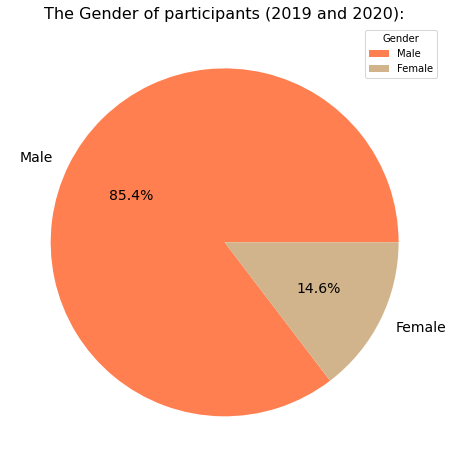

In [118]:
#Although I removed all diverse participants, it still appeared as a category group in my Gender column so i removed them before creating the pie chart
result_df["Gender"] = result_df["Gender"].cat.remove_categories("Diverse")
plt.figure(figsize= (18, 8))
result_df['Gender'].value_counts().plot.pie(autopct= '%1.1F%%', fontsize= 14, shadow= False, colors = ['coral','tan'])
plt.title('The Gender of participants (2019 and 2020):',fontsize = 16)
plt.ylabel('')
plt.legend(title= 'Gender')
plt.show()

This is the distribution for the overal data set (2019 and 2020)

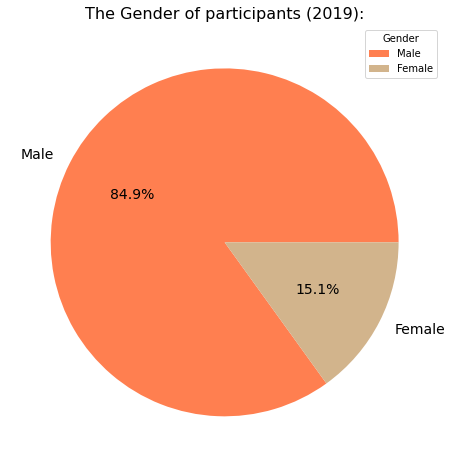

In [119]:
result_df_2019 = result_df[(result_df['Date'] > "2019-01-01") & (result_df['Date'] < "2019-12-31")]
plt.figure(figsize= (18, 8))
result_df_2019['Gender'].value_counts().plot.pie(autopct= '%1.1F%%', fontsize= 14, shadow= False, colors = ['coral','tan'])
plt.title('The Gender of participants (2019):',fontsize = 16)
plt.ylabel('')
plt.legend(title= 'Gender')
plt.show()

The distribution for 2019

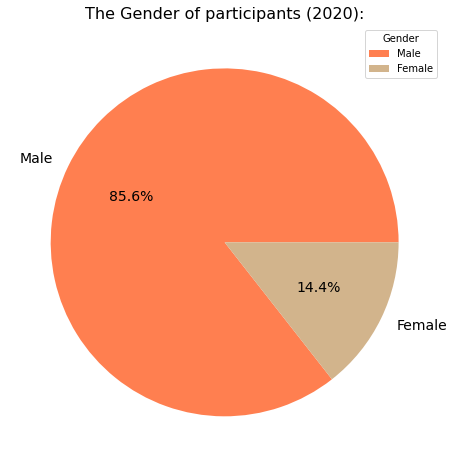

In [120]:
result_df_2020 = result_df[(result_df['Date'] > "2020-01-01") & (result_df['Date'] < "2020-12-31")]
plt.figure(figsize= (18, 8))
result_df_2020['Gender'].value_counts().plot.pie(autopct= '%1.1F%%', fontsize= 14, shadow= False, colors = ['coral','tan'])
plt.title('The Gender of participants (2020):',fontsize = 16)
plt.ylabel('')
plt.legend(title= 'Gender')
plt.show()

We can see that the percentage of male and female participants doesn't change too much as the year increases so its more or less constant

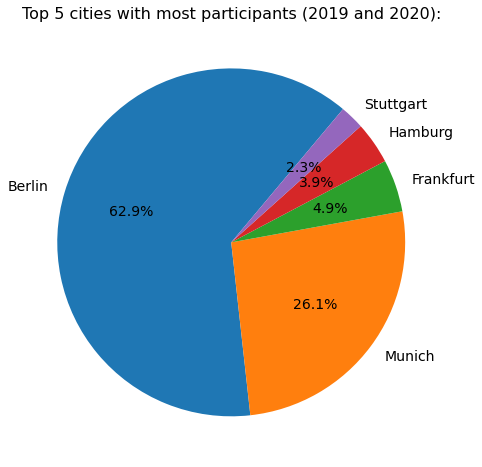

In [121]:
#Discovering cities where most participants represent for the overal data set
plt.figure(figsize= (18,8))
plt.pie(result_df['City'].value_counts().head(5), labels= result_df['City'].value_counts().head(5).index ,textprops ={'fontsize' : 14}, 
           shadow= False, startangle= 50, autopct= '%1.1F%%')
plt.title('Top 5 cities with most participants (2019 and 2020):', fontsize= 16)
plt.show()

Distribution of participants in cities for 2019 and 2020

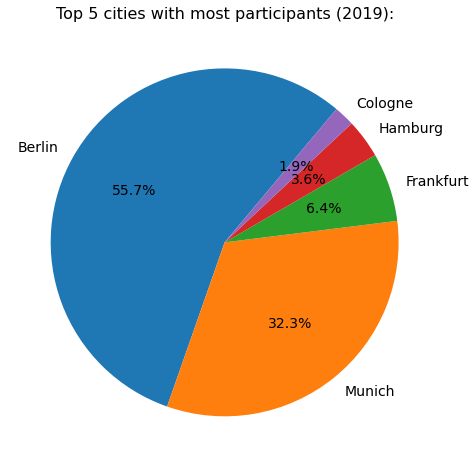

In [122]:
#Discovering cities where most participants represent for the 2019 participants
plt.figure(figsize= (18,8))
plt.pie(result_df_2019['City'].value_counts().head(5), labels= result_df_2019['City'].value_counts().head(5).index ,textprops ={'fontsize' : 14}, 
           shadow= False, startangle= 50, autopct= '%1.1F%%')
plt.title('Top 5 cities with most participants (2019):', fontsize= 16)
plt.show()

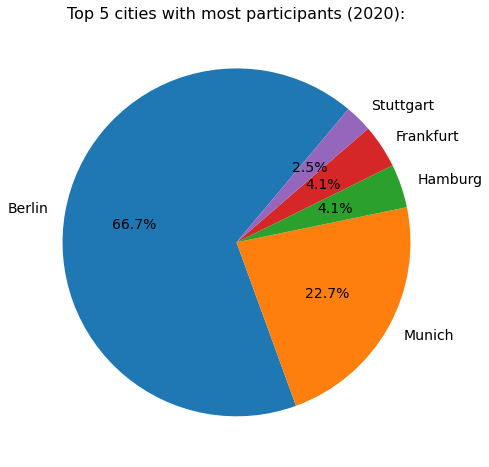

In [123]:
#Discovering cities where most participants represent for the 2020 participants
plt.figure(figsize= (18,8))
plt.pie(result_df_2020['City'].value_counts().head(5), labels= result_df_2020['City'].value_counts().head(5).index ,textprops ={'fontsize' : 14}, 
           shadow= False, startangle= 50, autopct= '%1.1F%%')
plt.title('Top 5 cities with most participants (2020):', fontsize= 16)
plt.show()

From the diagrams above it seems participants in 2019 were not as many as from Berlin as in the other years. Cologne also seems to be more represented from the 2019 participants but the overall data set is consistent with the 2020 participants.

I would like to know what programming languages participants used the most from the data set to understand what the current trends are in the industry. I will first plot the 10 most frequently used programming languages for all participants (2019 and 2020)

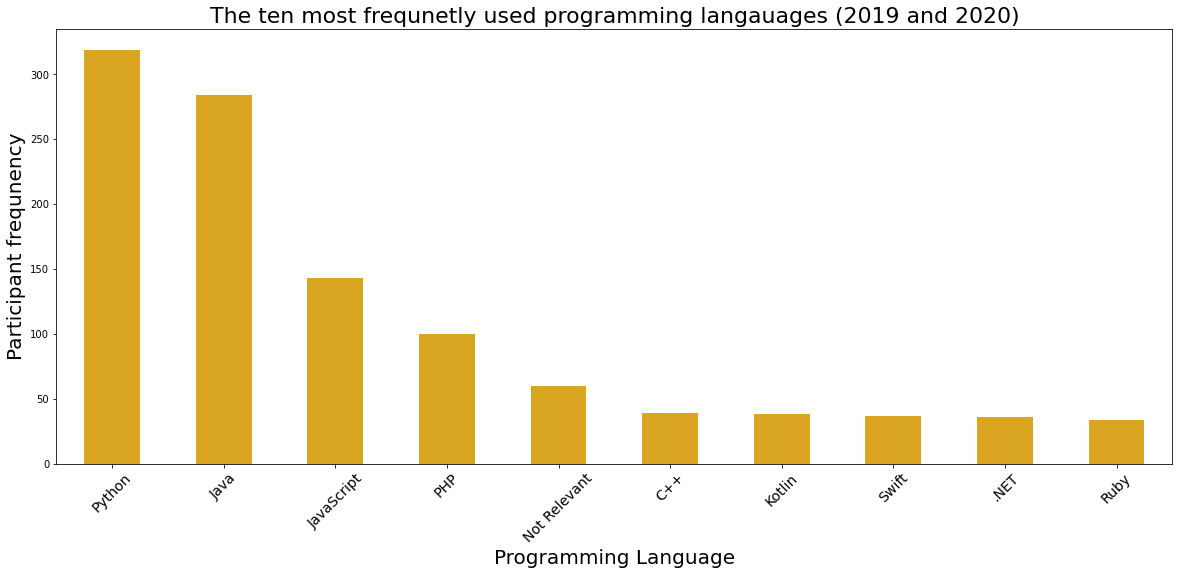

In [124]:
#Most popular programming languages of participants for 2019 and 2020

plt.figure(figsize=(20, 8))
ax = result_df['Main language'].value_counts().head(10).plot(kind = 'bar', color = 'goldenrod')
plt.title('The ten most frequnetly used programming langauages (2019 and 2020)', fontsize = 22)
plt.xlabel('Programming Language', fontsize = 20)
plt.ylabel('Participant frequnency', fontsize = 20)
plt.xticks(fontsize = 14, rotation = 45)
plt.show()


The plot above gives us a key insight into the trends of programming languages in the market for the period spanning 2019 and 2020. I see that Python, Java, Jvavascript, PHP are by far the most popular programming langauges, However I would like to check if this trend is something that changed from 2019 to 2020 or if it has always been this way. Therefore I will plot the most popular langauges for 2019 and 2020 separately

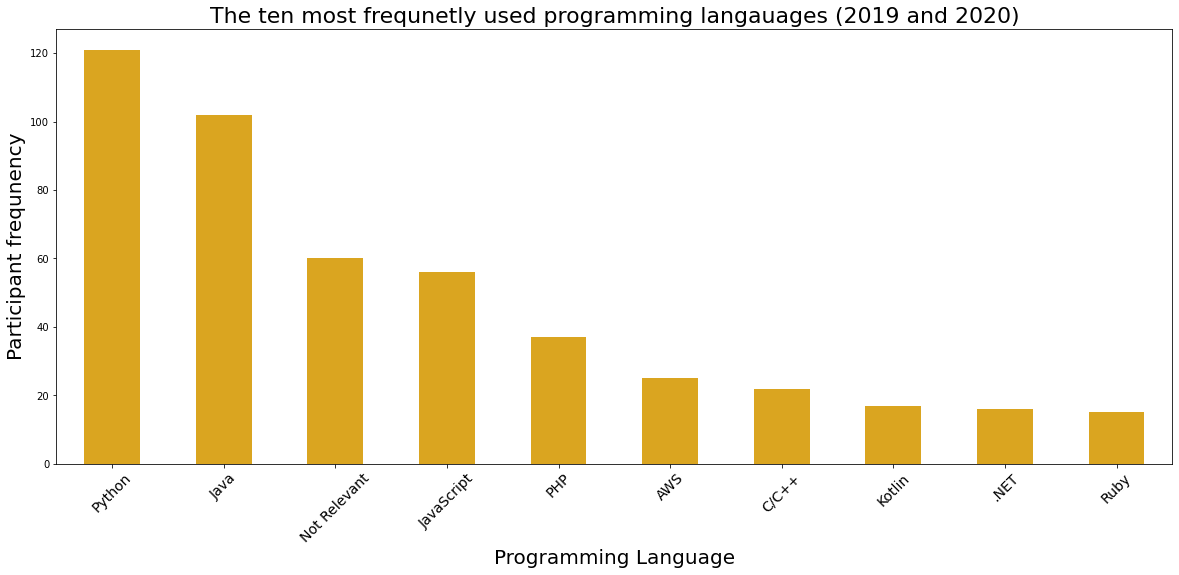

In [125]:
#Most popular programming languages of participants for 2019

plt.figure(figsize=(20, 8))
ax = result_df_2019['Main language'].value_counts().head(10).plot(kind = 'bar', color = 'goldenrod')
plt.title('The ten most frequnetly used programming langauages (2019 and 2020)', fontsize = 22)
plt.xlabel('Programming Language', fontsize = 20)
plt.ylabel('Participant frequnency', fontsize = 20)
plt.xticks(fontsize = 14, rotation = 45)
plt.show()

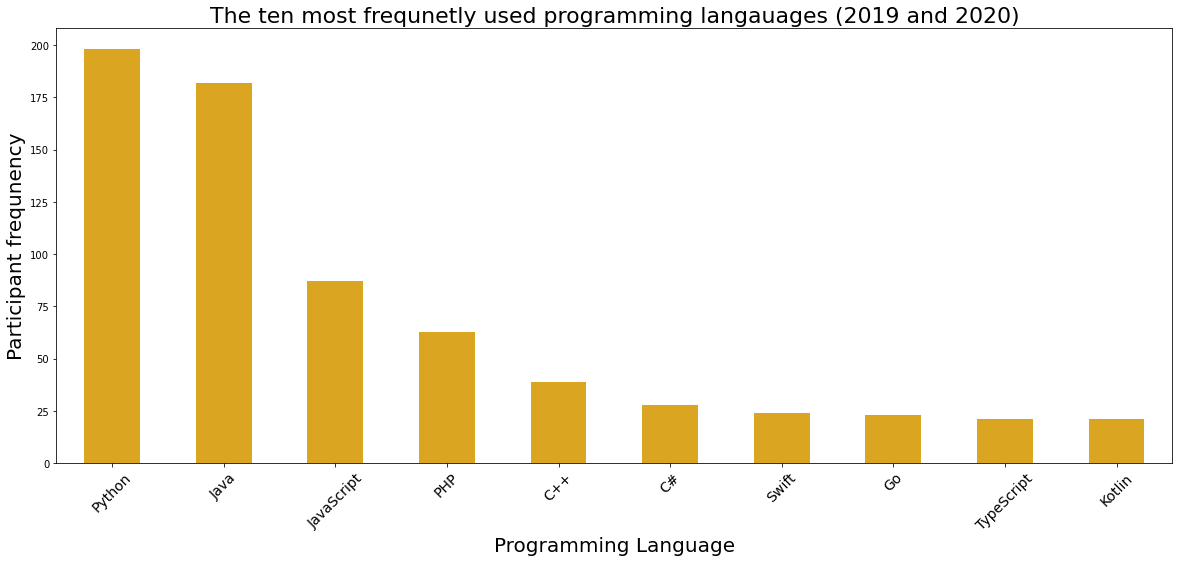

In [126]:
#Most popular programming languages of participants for 2020

plt.figure(figsize=(20, 8))
ax = result_df_2020['Main language'].value_counts().head(10).plot(kind = 'bar', color = 'goldenrod')
plt.title('The ten most frequnetly used programming langauages (2019 and 2020)', fontsize = 22)
plt.xlabel('Programming Language', fontsize = 20)
plt.ylabel('Participant frequnency', fontsize = 20)
plt.xticks(fontsize = 14, rotation = 45)
plt.show()

From the plots it seems there aren't any significant changes in the trends of the popular programming languages across the two years. Therefore, it is safe to say it is a good idea to know Python, Java and PHP in the industry.

Now that I have visualised the most popular programming languages amongst participants, I want to see how well the salries for knowing each programming language stack up against each other

No handles with labels found to put in legend.


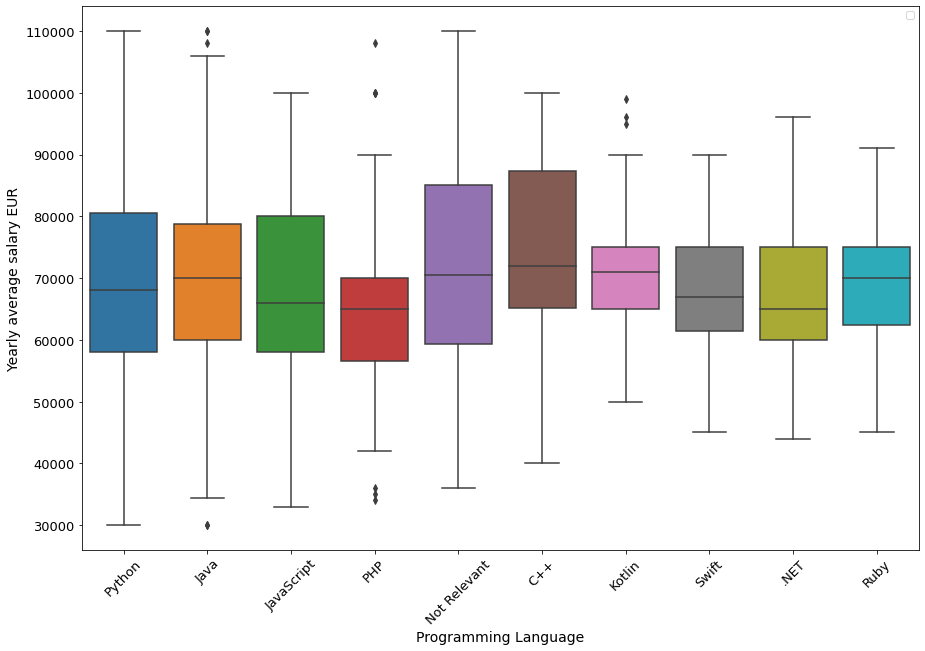

In [127]:
#Boxplots of distribution of programming languages and their respective salary
plt.figure(figsize=(15,10))
sns.boxplot(data = Salary ,y='Yearly salary', x='Main language',  order=result_df['Main language'].value_counts().iloc[:10].index)
plt.legend()
plt.xticks(rotation=45,fontsize=13)
plt.xlabel('Programming Language',fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Yearly average salary EUR",fontsize=14)
plt.show()

It can be seen that Java and C++ have high average salaries while PHP has lower average salaries

I have determined how the gender distribution of the salries shaped up, but I would now like to see how the salary now varies with the gender. I will use a histogram to visualise how the salaries of participants vary with their gender. Is the industry fair or is there a pay gap?

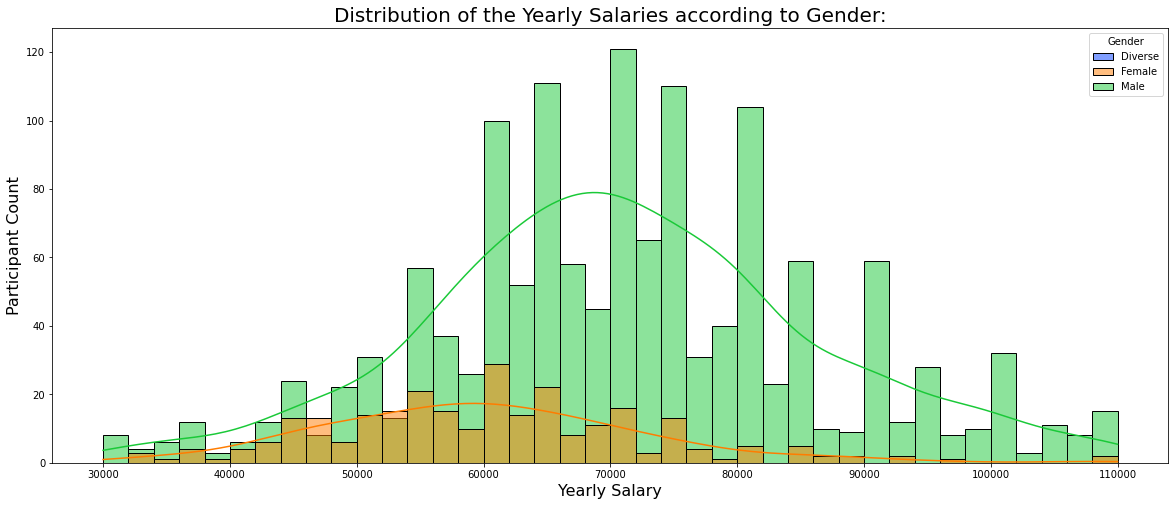

In [128]:
#Salary distribution with gender
plt.figure(figsize = (20,8))
sns.histplot(data = Salary, x= 'Yearly salary', hue = 'Gender', palette= 'bright', kde= True, bins = 40)
plt.title('Distribution of the Yearly Salaries according to Gender:',fontsize= 20)
plt.xlabel('Yearly Salary', fontsize= 16)
plt.ylabel('Participant Count', fontsize= 16)
plt.show()



As expected, the males have a higher participant count so their individual bars are larger, what is of interest here is the probability density function which is the line that guides each of the histogram plots. I can see that line is higher for males than females meaning the average male salary is higher than the average female salary for the participants. 

Now I would like to see which cities pay the highest salaries on average

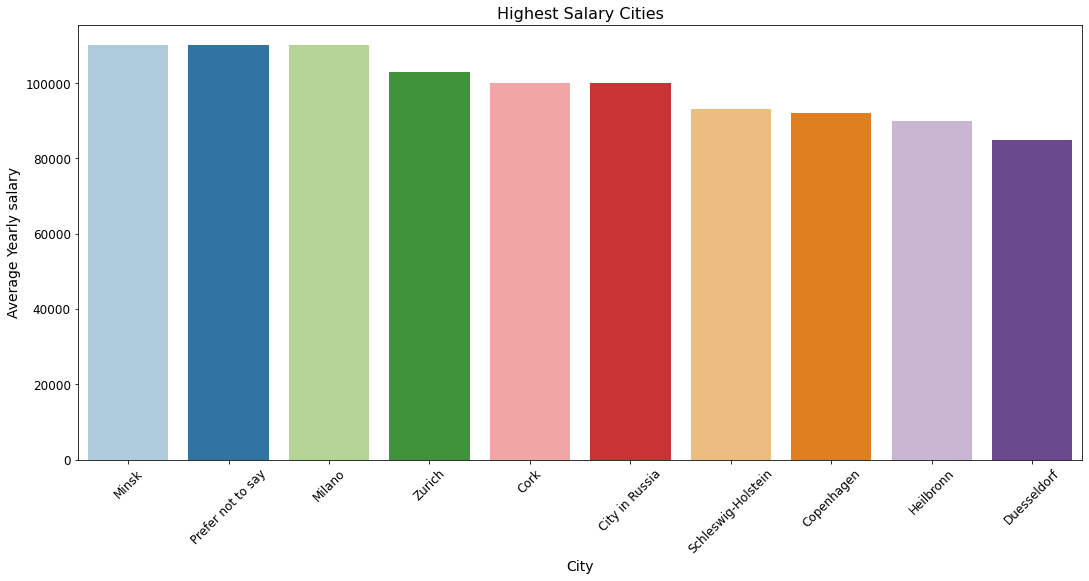

In [129]:
#Group Cities by salary averages and plot barplot
city_salary = Salary.groupby('City', as_index= False).mean().sort_values('Yearly salary', ascending = False)
city_salary = city_salary.head(10)
plt.figure(figsize = (18,8))
ax = sns.barplot(data= city_salary, x= 'City', y= 'Yearly salary',palette= 'Paired')
plt.title('Highest Salary Cities', fontsize= 16)
plt.xlabel('City', fontsize = 14)
plt.ylabel('Average Yearly salary', fontsize= 14)
plt.xticks(fontsize= 12, rotation= 45)
plt.yticks(fontsize = 12)

plt.show()



It can be seen Minsk, Milano and Zurich pay the highest salaries per the dataset

Now I would like to look into the influence of an individual's position and the respective salary, to do this, I will start with a barplot to visualize the respective frequencies of the positions to get an idea of how many of each are in the data set


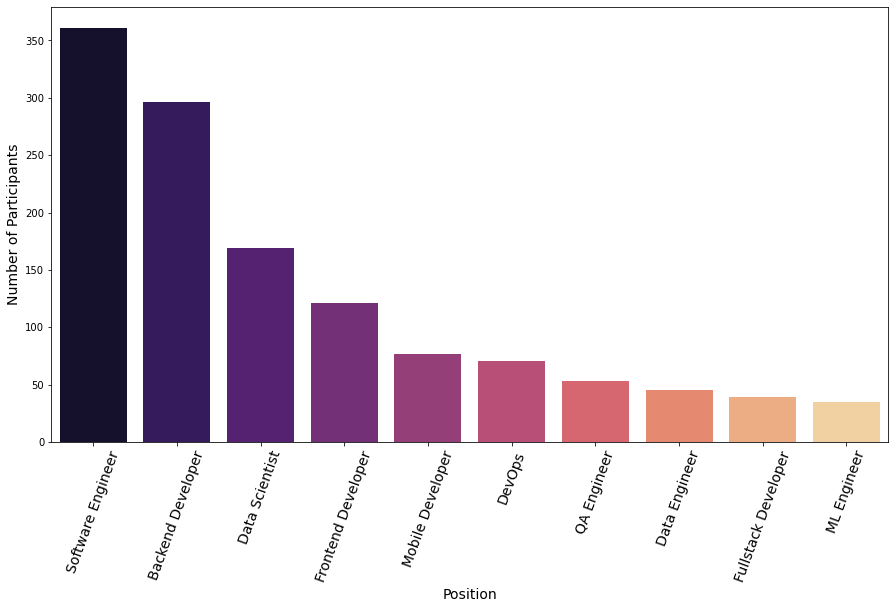

In [130]:
#Plot frequency of each position to give visual que on frequnecy
plt.figure(figsize=(15,8))
sns.countplot(data=result_df,x='Position', order=result_df['Position'].value_counts().iloc[:10].index, palette='magma')
plt.xticks(rotation=70,fontsize= 14)
plt.xlabel("Position",fontsize=14)
plt.ylabel("Number of Participants",fontsize=14)
plt.show()


In [131]:
#Group Salary by positions and obtain the total sums of salary per position
position_salary = result_df['Yearly salary'].groupby(result_df['Position']).sum()
position_salary.sort_values(ascending=False,inplace=True)
position_salary.head(10)

Position
Software Engineer     26190208.0
Backend Developer     20814795.0
Data Scientist        11670600.0
Frontend Developer     7798855.0
Mobile Developer       5460200.0
DevOps                 5128800.0
QA Engineer            3264300.0
Data Engineer          3111146.0
Software Architect     3004600.0
Manager                2623000.0
Name: Yearly salary, dtype: float64

The code above grouped the respextive salaries with their positions and found tge sum of the salaries per a given position. As expected a position with a high frequecy of participants will likely have a a higher cummulative salary. A more useful metric to caluculate will be the avergae salary per position as it takes into account the number of participants and reduces any bias


In [132]:
#Calaculates average salary per position in dataset from the cumuulative
top_salary = position_salary.iloc[:10].index.to_list()
average_salary = (position_salary/ result_df['Position'].value_counts()).sort_values(ascending = False)

for position in top_salary:
    print(position,": ",round(average_salary[position],2))

Software Engineer :  72549.05
Backend Developer :  70320.25
Data Scientist :  69056.8
Frontend Developer :  64453.35
Mobile Developer :  70911.69
DevOps :  72236.62
QA Engineer :  61590.57
Data Engineer :  69136.58
Software Architect :  96922.58
Manager :  87433.33


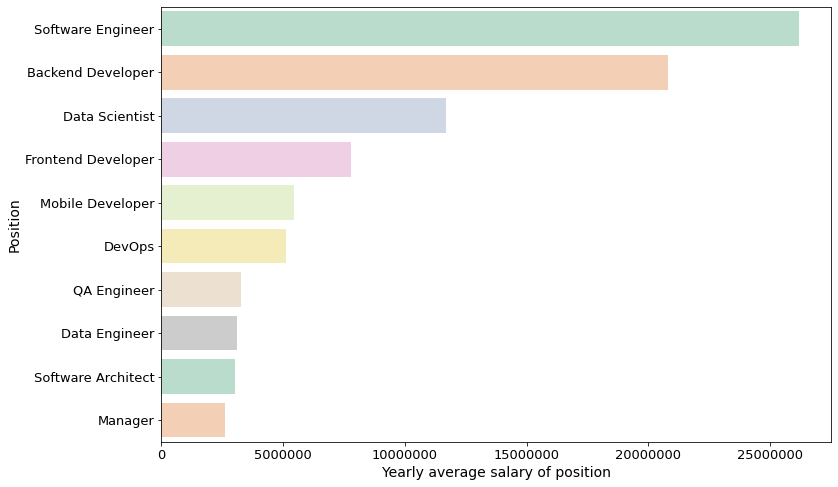

In [133]:
# Highest Earning Professions 
position_salary = position_salary.to_frame()

plt.figure(figsize=(12,8))
sns.barplot(data= position_salary, y=position_salary.index[:10], x= position_salary['Yearly salary'].iloc[:10], order=position_salary.iloc[:10].index, palette='Pastel2')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=13)
plt.xlabel("Yearly average salary of position",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Position",fontsize=14)
plt.show()

I have now visualised the highest earning IT roles with their respective salaries. It can be seen that software engineers and Backend developers take the cake with the most earnings while managers earn least.


Now I want to visualise how many years of experience is typyically necessary to attain Seniority levels amongst the positions present amongst applicants, I will be looking at Junior, Middle and Senior roles

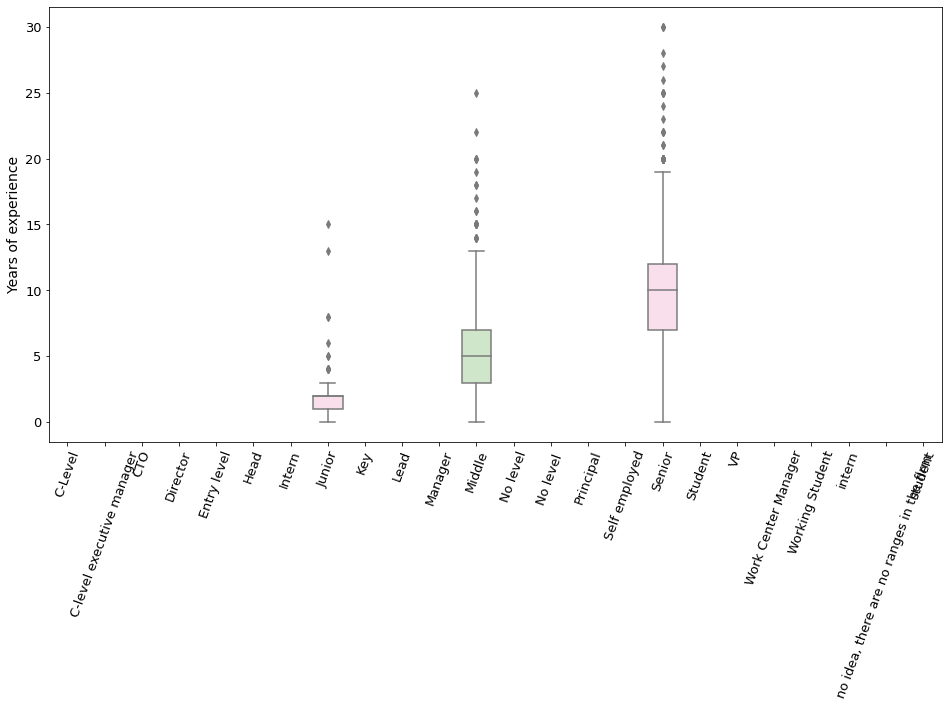

In [134]:
#Boxplots of experince levels per position

result_df['Years of experience'].value_counts()

experience = result_df.copy().dropna(subset=['Years of experience'])

plt.figure(figsize=(16,8))
sns.boxplot(data= experience[experience['Seniority level'].isin(['Senior','Junior','Middle'])],x='Seniority level',y='Years of experience',palette='Pastel1')
plt.xticks(rotation=70, fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Years of experience",fontsize=14)
plt.show()

As expected, the Senior poistion requires the most amount of experience on average while the Middle position requires less experience and the  junior position requires the least amount of experience. A more powerfule insight will be to view how much more the yearly salary increases on average for a given position. I will use boxplots to show how much more the salary increases per the increase in position

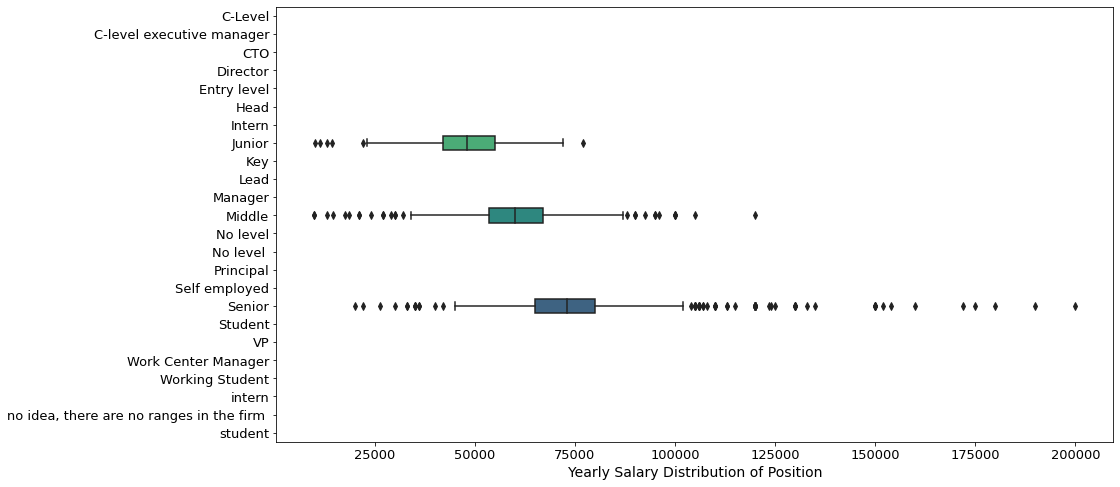

In [135]:
#Boxplots showing salary distribution for each position
plt.figure(figsize=(15,8))
sns.boxplot(data=experience[experience['Seniority level'].isin(['Senior','Junior','Middle'])],
           y='Seniority level',x='Yearly salary',palette='viridis_r')
plt.xticks(fontsize=13)
plt.xlabel("Yearly Salary Distribution of Position",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("")
plt.show()

As expected we can see Senior postions make more than Middle positions and middle positions also make more than junior positions. Senior positions also have a hgher number if outliers meaning that there is a wide difference in what a senior position at a given type of company might stand to make. 

Per the database exploration phase I found there were three main company types, I want to explore the frequencies of these types amongst the datsaet participants. 

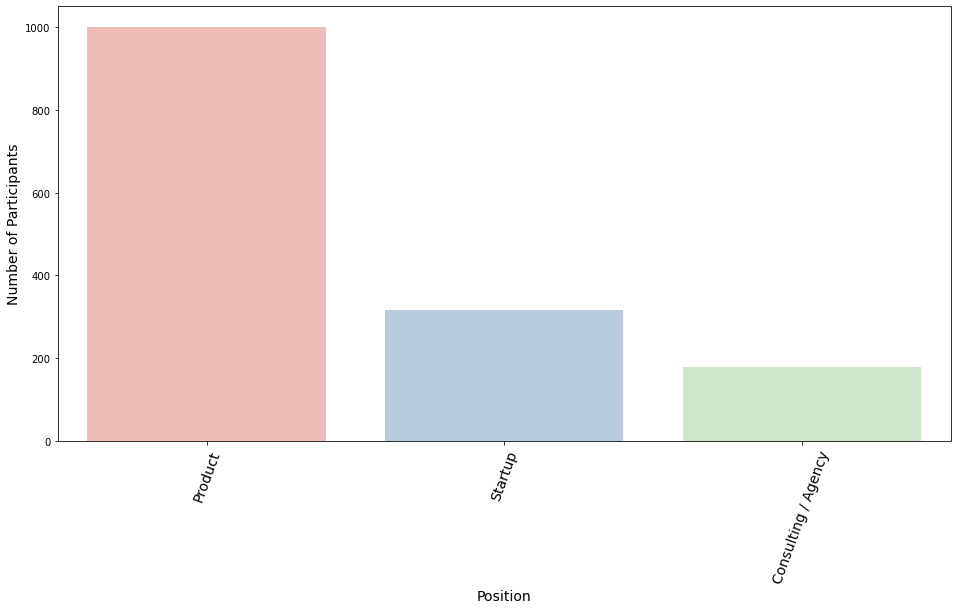

In [136]:
#Frequency of participants belonging to the major company types
company_type_major = result_df.loc[result_df['Company type'].isin(['Product', 'Startup', 'Consulting / Agency'])]

plt.figure(figsize=(16,8))
sns.countplot(data=result_df,x='Company type', order=result_df['Company type'].value_counts().iloc[:3].index, palette='Pastel1')
plt.xticks(rotation=70,fontsize= 14)
plt.xlabel("Position",fontsize=14)
plt.ylabel("Number of Participants",fontsize=14)
plt.show()

I have now seen that product companies have the most participants and Consulting have the least amongst the three main types. Amongst these types I want to explore additional relationships like how the average salaries, Years of experience, vacation days and ages vary amonst each type of company

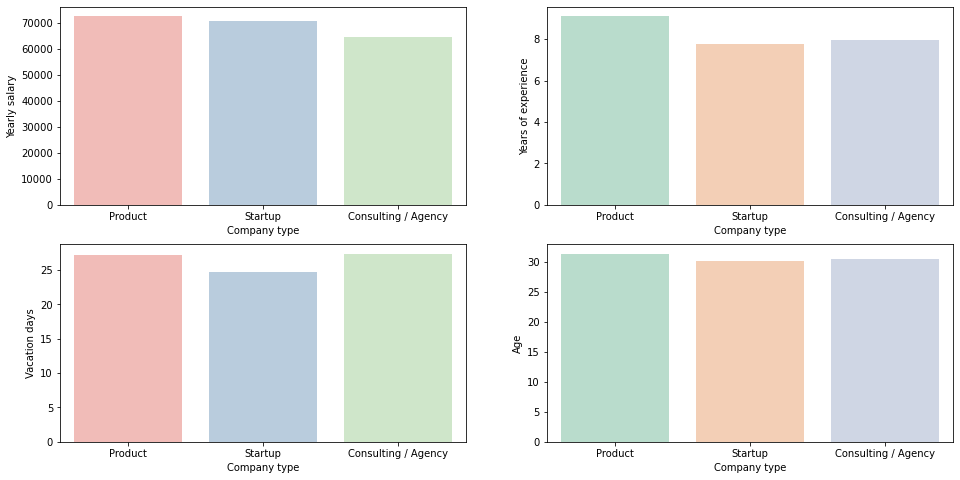

In [137]:
company_type = company_type_major.groupby('Company type', as_index= False).mean()


fig = plt.figure(figsize= (16, 8))
axs = fig.subplots(nrows=2, ncols= 2)
sns.barplot(data = company_type, x= 'Company type', y = 'Yearly salary', order=result_df['Company type'].value_counts().iloc[:3].index, ax = axs[0,0], palette= 'Pastel1')
sns.barplot(data = company_type, x= 'Company type', y = 'Years of experience',order=result_df['Company type'].value_counts().iloc[:3].index, ax = axs[0,1], palette = 'Pastel2')
sns.barplot(data = company_type, x= 'Company type', y = 'Vacation days',order=result_df['Company type'].value_counts().iloc[:3].index, ax = axs[1,0], palette = 'Pastel1')
sns.barplot(data = company_type, x= 'Company type', y = 'Age', order=result_df['Company type'].value_counts().iloc[:3].index, ax = axs[1,1], palette = 'Pastel2')
plt.show()

From the above diagram it can be seen that start ups have the lowest number of vacation days and years of experience requires. The consulting agencies have the lowest yearly salaries as well. Product companies pay higher salaries and give higher vacation days as well. 

It was noted that there are several types of companies based on the size of their employee strength, therefore I would like to see the relationship between the size of a company and the average salary, vaction days, age and years of experience of its employees.

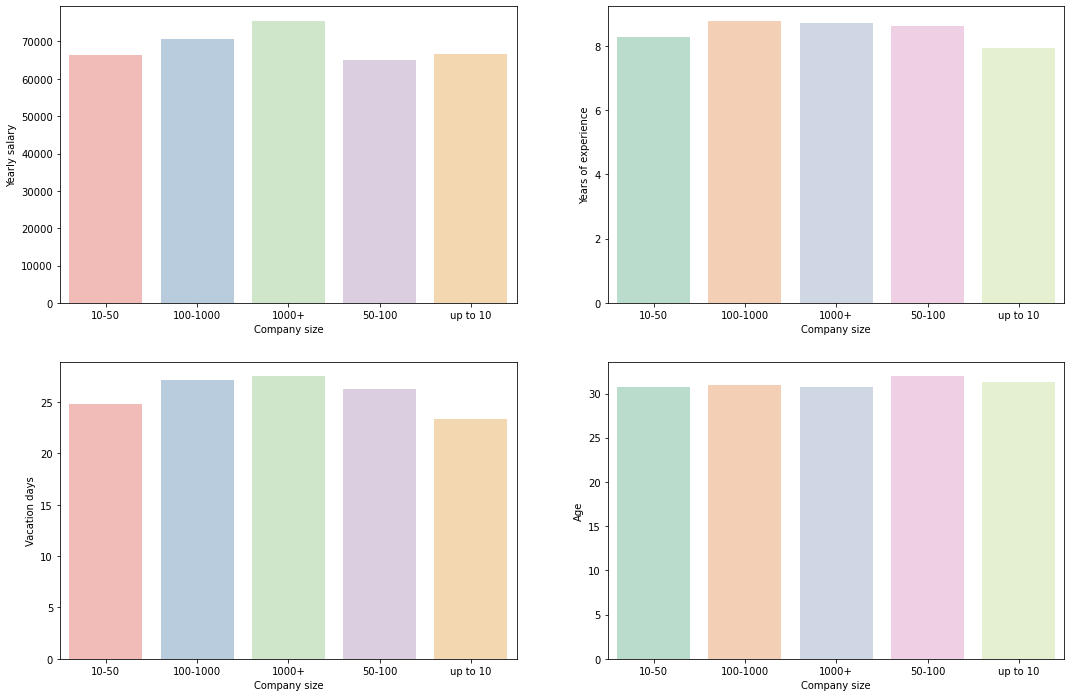

In [138]:
company_size = result_df.groupby('Company size', as_index = False).mean()

fig = plt.figure(figsize= (18, 12))
axs = fig.subplots(nrows=2, ncols= 2)
sns.barplot(data = company_size, x= 'Company size', y = 'Yearly salary', ax = axs[0,0], palette= 'Pastel1')
sns.barplot(data = company_size, x= 'Company size', y = 'Years of experience', ax = axs[0,1], palette = 'Pastel2')
sns.barplot(data = company_size, x= 'Company size', y = 'Vacation days', ax = axs[1,0], palette = 'Pastel1')
sns.barplot(data = company_size, x= 'Company size', y = 'Age', ax = axs[1,1], palette = 'Pastel2')
plt.show()

From the plots above it can be seen that the size of a company affects several metrics of the employess. The 'Up to 10' companies require lower years of experience and typically give lower vacation day to their employees. The '10-50' group also has low vacation days a lower number of years of experience. The '1000+' compnaies have a  higer average salary and give more vacation days while typically having the highest average years of experience.



## Conclusion
For this assignment, I was able to merge a data sets containing information on various participants in an IT survey for two years. I cleaned and analysed the data set to make it appropriate to begin visualizing several key metrics from the data set. I uncovered numerous insights from the data set that will be relevant to anyone looking to understand the informatiom from the data set. 